In [1]:
from DCLayers import *
from DCWidget import *
%matplotlib inline

# Computing Apparent Resistivity

TODO: explain this

31.8536478638


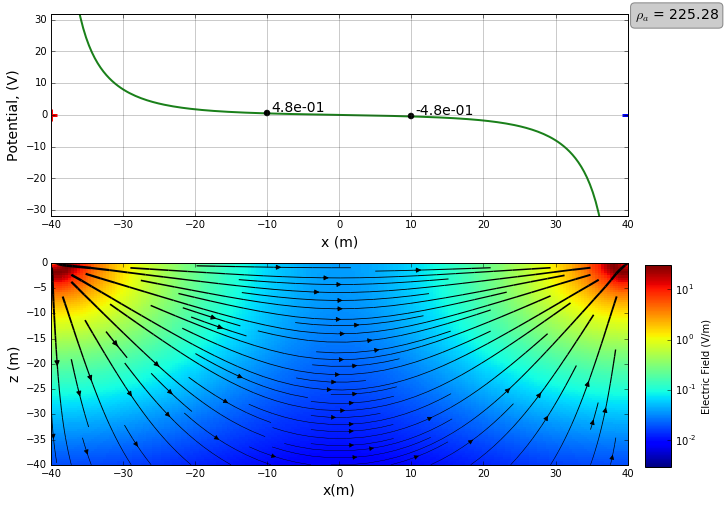

None

In [2]:
app = plot_Layer_Potentials_app()
app;

# Building Pseudosections 

TODO: explain this - these are midpoints, lay out each experiment type

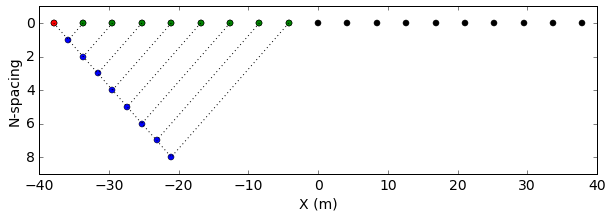

None

<function DCWidget.DipoleDipolefun>

In [3]:
MidpointPseudoSectionWidget()

# Inverting Data

TODO brief explination of Inversion

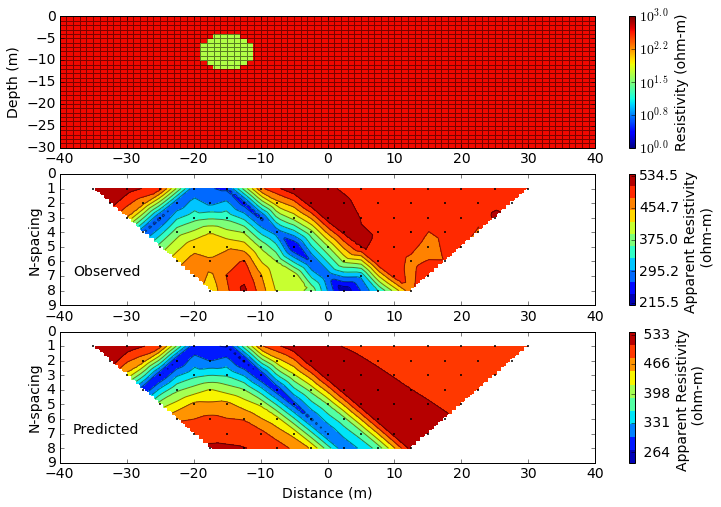

None

<function DCWidget.DC2DfwdWrapper>

In [4]:
app = DC2DfwdWidget()
app

In [6]:
mesh.aveCC2F.shape

(13630, 6728)

In [9]:
mesh.aveFx2CC.shape

(6728, 6786)

In [10]:
mesh.aveFy2CC.shape

(6728, 6844)

In [3]:
mesh.faceDivy

<6728x6844 sparse matrix of type '<type 'numpy.float64'>'
	with 13456 stored elements in Compressed Sparse Row format>